<a href="https://colab.research.google.com/github/Anil951/Early-detection-of-mental-health/blob/main/prepare_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('/content/mental_health.csv')
df

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1


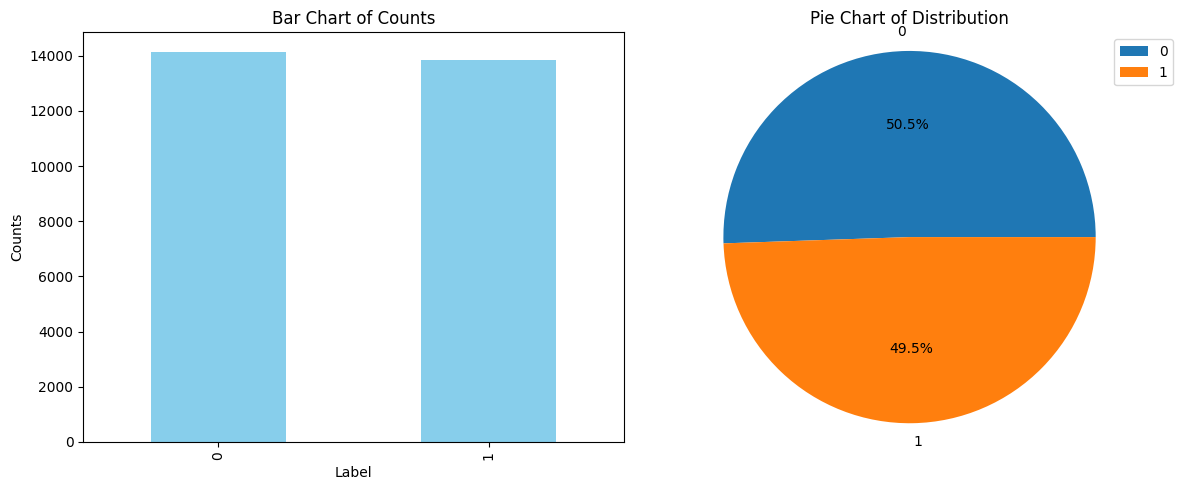

In [9]:
import matplotlib.pyplot as plt

category_counts = df['label'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
category_counts.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_xlabel('Label')
ax[0].set_ylabel('Counts')
ax[0].set_title('Bar Chart of Counts')

# Pie chart
category_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax[1])
ax[1].set_ylabel('')  # Remove default y-axis label
ax[1].set_title('Pie Chart of Distribution')
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add legend for pie chart
ax[1].legend()

# Display the plots
plt.tight_layout()
plt.show()


In [10]:
print('total size: ', df.shape[0])

# Do we have duplicates?
print(' Duplicates:', len(df[df.duplicated()]))

# Do we have missing values?
missing_values = df.isnull().sum()
print('Missing Values by column:\n',missing_values)

print('Missing Values:', df.isnull().sum().sum())

total size:  27977
 Duplicates: 5
Missing Values by column:
 text     0
label    0
dtype: int64
Missing Values: 0


In [11]:
df.replace("", np.nan, inplace=True)
missing_values = df.isnull().sum()
print('Missing Values and Empty Spaces by column:\n',missing_values)

Missing Values and Empty Spaces by column:
 text     0
label    0
dtype: int64


In [12]:
duplicate_rows = df[df.duplicated(keep=False)]

# Then sort the dataframe on all columns to ensure duplicates are adjacent
sorted_duplicates = duplicate_rows.sort_values(by=list(duplicate_rows.columns))

# Now, if we want to see 5 pairs of duplicates (10 rows), we can simply:
top_5_duplicate_pairs = sorted_duplicates.head(20)

top_5_duplicate_pairs

,text,label
15524,happy birthday everyone birthday st october ha...,0
24502,happy birthday everyone birthday st october ha...,0
16742,need help anyone good pythagriam tribometry h...,0
24970,need help anyone good pythagriam tribometry h...,0
1646,posting ara ara forget day ara ara,0
22603,posting ara ara forget day ara ara,0
11570,real suppleroot hours up day far,0
12573,real suppleroot hours up day far,0
22389,real suppleroot hours up day far,0


In [13]:
df = df.drop_duplicates()
print('Duplicates:', len(df[df.duplicated()]))

Duplicates: 0


In [14]:
df = df.dropna()
print('Missing Values:', df.isnull().sum().sum())

Missing Values: 0


In [15]:
import re
import string

In [16]:
# cleaning data

def strip_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese characters
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(text):
    new_text = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', text)) #remove last hashtags
    new_text2 = " ".join(word.strip() for word in re.split('#|_', new_text)) #remove hashtags symbol from words in the middle of the sentence
    return new_text2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)


In [18]:
df['c_text'] = (df['text']
                     .apply(strip_emoji)
                     .apply(strip_all_entities)
                     .apply(clean_hashtags)
                     .apply(filter_chars)
                     .apply(remove_mult_spaces))
df.head()

,text,label,c_text
0,dear american teens question dutch person hear...,0,dear american teens question dutch person hear...
1,nothing look forward lifei dont many reasons k...,1,nothing look forward lifei dont many reasons k...
2,music recommendations im looking expand playli...,0,music recommendations im looking expand playli...
3,im done trying feel betterthe reason im still ...,1,im done trying feel betterthe reason im still ...
4,worried year old girl subject domestic physic...,1,worried year old girl subject domestic physica...


In [19]:
def remove_stopwords(sentence):
    # List of stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

    # Sentence converted to lowercase-only
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence

In [20]:
df['c_text2'] = (df['c_text'].apply(remove_stopwords))

In [21]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    # Tokenize the sentence
    word_list = nltk.word_tokenize(text)

    # Lemmatize list of words and join
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])

    return lemmatized_output

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [22]:
df['c_text3'] = df['c_text2'].apply(lemmatize_text)

In [23]:
df['text_length'] = df['c_text3'].apply(lambda x: len(str(x).split()))

In [28]:
text_lengths = [len(text.split()) for text in df["c_text3"]]

# Find the 95th quartile
quartile_95 = np.percentile(text_lengths, 95)

print(f"95th Quartile of Text Lengths: {quartile_95}")

95th Quartile of Text Lengths: 231.0


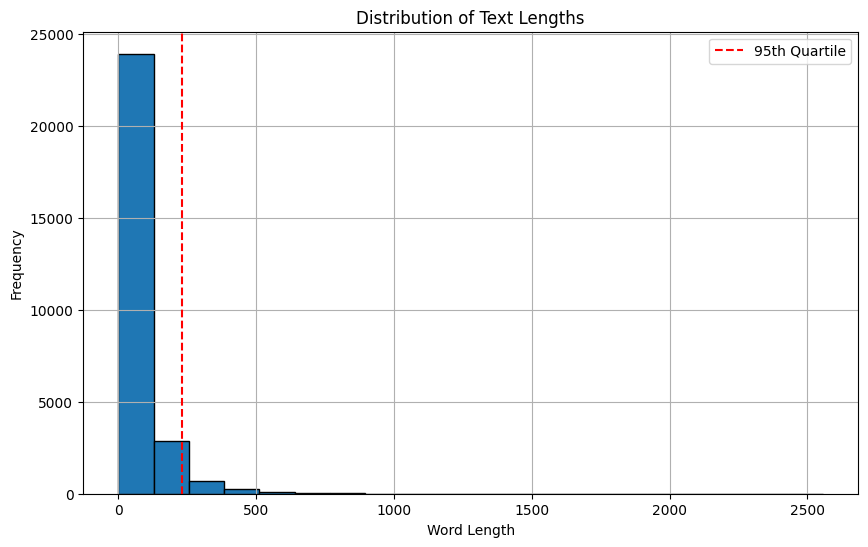

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=20, edgecolor='black')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')

# Adding a vertical line for the 95th quartile
quartile_95 = np.percentile(text_lengths, 95)
plt.axvline(x=quartile_95, color='red', linestyle='--', label='95th Quartile')
plt.legend()

plt.grid(True)
plt.show()

In [30]:
df = df.drop(['text', 'c_text', 'c_text2'], axis=1)

In [31]:
df.label.value_counts()

,count
label,
0,14134
1,13838


In [32]:
data = {
    'Label': ["Non-mental-health", "Mental-health"],
    'Label Encoded': [0,1]
}

dr = pd.DataFrame(data)
dr

,Label,Label Encoded
0,Non-mental-health,0
1,Mental-health,1


In [34]:
df = df.drop(['text_length'], axis=1)

In [36]:
df.to_csv("clean.csv", index=False)

print(f"DataFrame saved")

DataFrame saved
